In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Load the dataset into python environment**

**2. Make ‘PassengerId’ as the index column**


In [59]:
data = pd.read_csv('/content/titanic_dataset.csv',index_col='PassengerId')

In [60]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3.Check the basic details of the dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.shape

(891, 11)

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

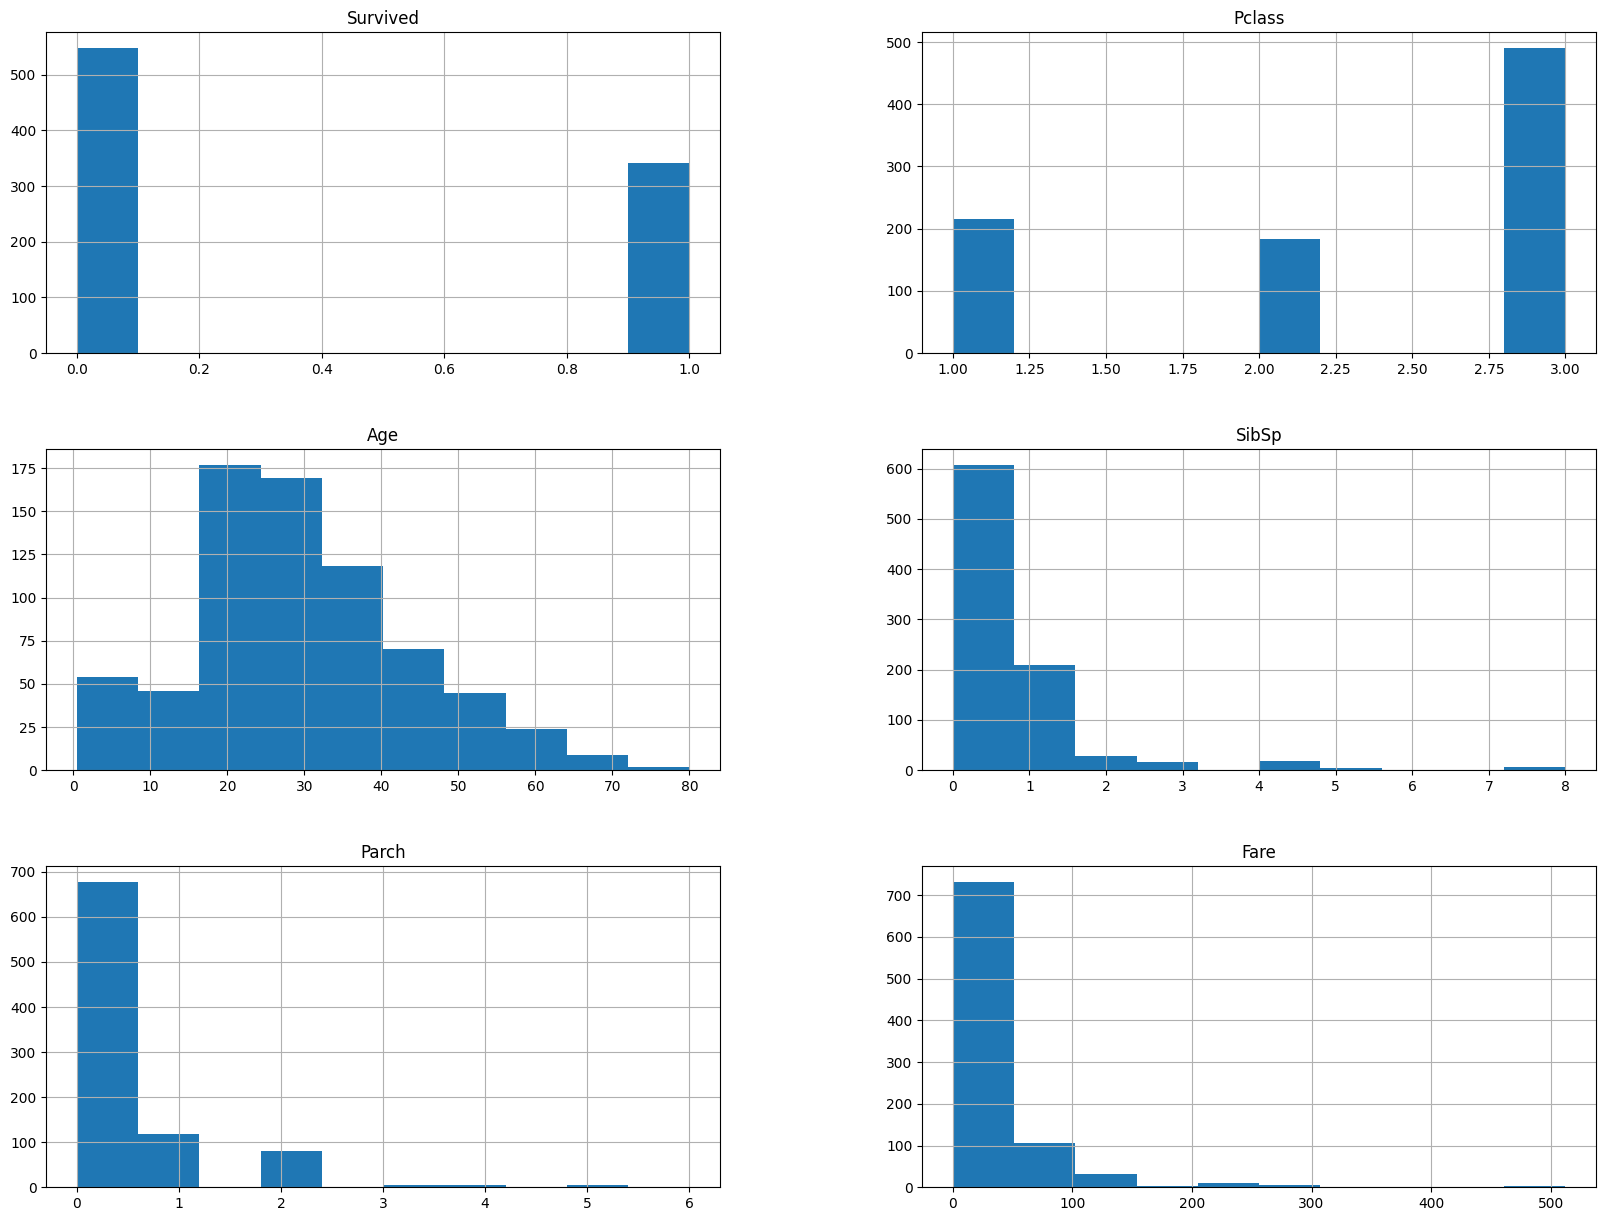

In [11]:
data.hist(figsize=(20,15))
plt.show()

**4.Fill in all the missing values present in all the columns in the dataset**

In [12]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Cabin'] = le.fit_transform(data['Cabin'] )

In [15]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**5. Check and handle outliers in at least 3 columns in the dataset**


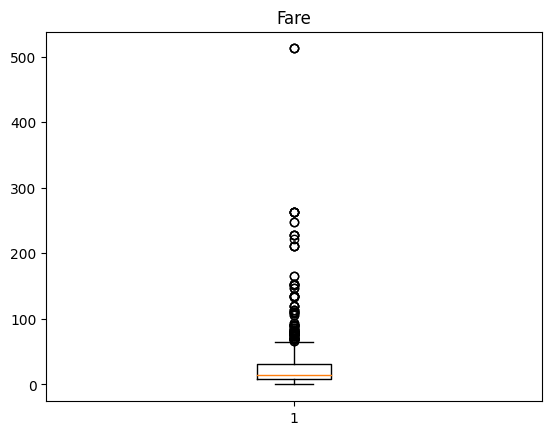

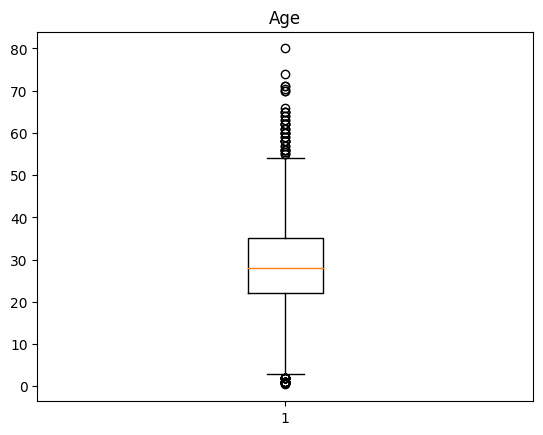

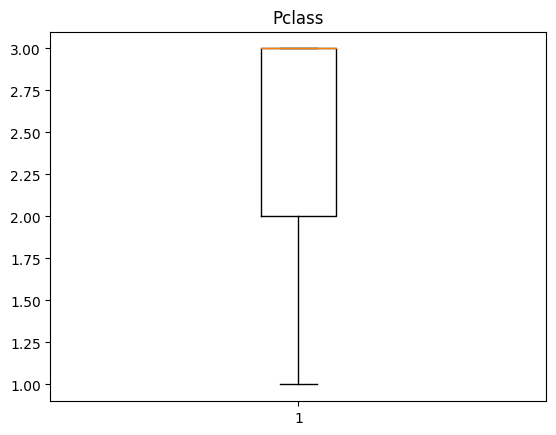

In [ ]:
num_col = ['Fare','Age','Pclass']
for i in num_col:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()



Removing one value from Fare column

In [24]:
q1 = np.percentile(data['Age'],25,method='midpoint')
q2 = np.percentile(data['Age'],50,method='midpoint')
q3 = np.percentile(data['Age'],75,method='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5*iqr
print(up_lim)

54.5


In [41]:
outlier=[]
for x in data['Age']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 57.0, 1.0, 2.0, 1.0, 62.0, 74.0, 56.0]


In [39]:

ind = data['Age'] ==  0.42
data.loc[ind].index


Int64Index([804], dtype='int64', name='PassengerId')

In [31]:
data.drop([470,645,79,832,756,804],inplace=True)

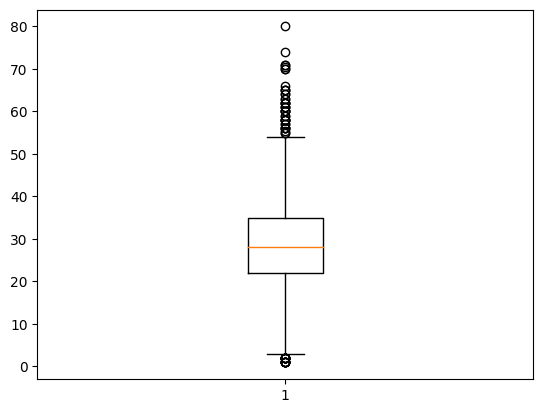

In [42]:
plt.boxplot(data['Age'])
plt.show()

**6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [43]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Label Encode Name,Sex and Ticket before scaling

In [45]:
data['Name'] = le.fit_transform(data['Name'] )
data['Sex'] = le.fit_transform(data['Sex'] )
data['Ticket'] = le.fit_transform(data['Ticket'] )

In [51]:
y =data['Survived']

In [52]:
X =data.drop('Survived',axis=1)

In [56]:
minmax = MinMaxScaler(feature_range=(0,1))
x = minmax.fit_transform(X)
x = pd.DataFrame(x)

In [57]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.653672,0.500000,0.647458,0.362112,0.064972,0.062712,0.499007,0.063044,0.888666,0.514124
std,0.418871,0.289165,0.478032,0.162459,0.137966,0.134266,0.295711,0.097293,0.245723,0.263800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.250000,0.000000,0.266566,0.000000,0.000000,0.232695,0.015412,1.000000,0.333333
50%,1.000000,0.500000,1.000000,0.342438,0.000000,0.000000,0.494845,0.028213,1.000000,0.666667
75%,1.000000,0.750000,1.000000,0.430956,0.125000,0.000000,0.765832,0.061045,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
